In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Group Project - Group 2
**OPIM 5509: Introduction to Deep Learning - University of Connecticut**
---------------------------------------------------------------------------


#**Introduction**


The insurance industry collects over $1 trillion in premiums each year across more than 7,000 companies. The sheer size of this market raises the cost of insurance fraud significantly by providing more opportunities and greater incentives for committing illegal activities. [[1]](https://fbi.gov/stats-services/publications/insurance-fraud)

According to the Insurance Information Institute, insurance fraud is defined as “a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain” [[2]](https://www.iii.org/article/background-on-insurance-fraud). Common types of fraud include inflating claims, staging accidents, submitting claims for damage or injuries that never happened, or even misrepresenting facts on legal paperwork. 

Fraudulent activity can be internal or external in nature. Internal fraud typically involves agents of the insurance company perpetrating fraud against the company while external are committed by a wide range of actors from policyholders, to medical providers to vendors and others. Common types of external examples are creating fraudulent claims or exaggerating actual claims, among others. [[3]](https://doi.nebraska.gov/sites/doi.nebraska.gov/files/doc/examples.pdf)

Among all types of insurance fraud, the National Insurance Crime Bureau reports that auto fraud is the most common. Not only have auto related cases historically been on the rise, studies have also found that about 25% of all bodily injury clams related to auto crashes have been fraudulent. [[4]](https://www.foxbusiness.com/features/the-true-cost-of-auto-insurance-fraud-how-we-all-pay-in-increased-premiums)

When it comes to insurance related fraud, there are two categories, hard and soft fraud. Hard fraud refers to situations where someone stages an injury or loss in order to get a claim pay out. Two examples of this would be staging a triggered rear end auto collision and planting a witness while another would be planned vehicle theft. Soft fraud occurs more frequently and involves exaggeration or lying on an otherwise legitimate claim such as exaggerating repair costs after an auto collision or reporting injuries not sustained through the claim events. [[5]](https://www.allstate.com/tr/car-insurance/5-types-of-car-insurance-fraud.aspx)

According to an Insurance Research Council study done in 2012, it is estimates that claim fraud an
buildup added between $5.6 & 7.7 billion in excess payments to auto injury claims paid in the United States in 2012 alone. [[6]](https://www.insurance-research.org/sites/default/files/downloads/IRC%20Fraud%20News%20Release.pdf)

While this translates into billions of dollars of cost for insurance companies, it also has a negative impact on the normal policyholder. According to estimates from the National Insurance Crime Bureau, auto insurance fraud adds $200 to $300 a year to individual insurance premiums. [[7]](https://www.edmunds.com/auto-insurance/auto-insurance-fraud-what-it-costs-you.html#:~:text=Desperate%20people%20are%20going%20to,they%20can%20no%20longer%20afford.&text=Auto%20insurance%20fraud%20adds%20%24200,Insurance%20Crime%20Bureau%20(NICB))

This presents a two fold benefit if fraud detection techniques using data can be leveraged to reduce and minimise the volume and cost of fraudulent claims, both to companies and individuals. 
Senior VP of the IRC, said “The costs associated with auto injury claim abuse make auto insurance more expensive for everyone,” efforts to lower insurance costs must include measures
aimed at reducing the amount of fraud and buildup in the system.” 

Due to the sheer size of the insurance industry and the volume of claims, preventing losses from fraud entirely is impossible, so it’s important for companies to be able to leverage data analytics and modelling techniques in order to detect fraud, and ultimately mitigate its occurrence. In the past, fraud detection was mainly done by claims agents who had to rely on few facts and a large amount of intuition. [[8]](https://www.reutersevents.com/insurance/fraud/role-data-and-analytics-insurance-fraud-detection)

Most insurance companies did not have automated ways to detect and mitigate fraudulent claims due to heavy investment that was needed into data analytics and modelling. However, new technology and advances in data analysis has introduced tools to make fraud review and detection possible. [[9]](https://www.infosys.com/industries/insurance/white-papers/documents/new-whistleblower-insurance-fraud.pdf)

Our project aims to help detect fraudulent claims in auto data in a statistical, automated fashion using machine learning techniques that can be leveraged and improved on a greater scale to provide insights into what variables contribute to the detection of fraud. Similar efforts, but on a broader scale, have been done by R. Roy and K. Thomas George. [[10]](ieeexplore.ieee.org/abstract/document/8074258)



WORKS CITED can be found at the end of this document.

#**Problem Statement**

Insurance fraud is so prevalent today that it is now the second most costly white-collar crime in America. Car insurance fraudulent claims have increased by 45% since the last year, with 21-30 year-olds making up the largest group. According to the National Insurance Crime Bureau, it is estimated that more than 10% of car insurance claims are fraudulent, costing thousands of dollars to insurance companies. The price for these frauds is ultimately borne by the common man. Innocent policyholders are often impacted by the high premiums and unnecessary extra fees that are charged to prevent fraud. It is more important now than ever to identify what kind of factors contribute most towards fraudulent claims and curb them or find a way to investigate more into them.


#**Data Gathering and Description**

Link to the dataset - https://docs.google.com/spreadsheets/d/1OokzRH6Zt4Vf4G3cuFKKJzwWKlaqETDeTccNhUIoChs/edit?usp=sharing

The Data Source - 	https://www.kaggle.com/roshansharma/insurance-claim

In order to obtain more information on fraudulent claims in the car insurance industry in the USA, we used a dataset that provides information of reported claims by insured clients among the states of Ohio, Illinois, and Indiana. This sample file contains 1000 rows and 27 columns which include client’s insurance information such as, months as customer, age, sex, occupation and income, etc. Additionally, this dataset also provides information related to the type of policy the customer holds and other important information that is used when filing a claim. 


##**Import Modules**

In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import seaborn as sns

# for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.metrics import accuracy_score

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read data
# navigate to the dataset and copy the path
df = pd.read_csv('/content/drive/Shareddrives/Deep Learning/insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


## **Perform EDA on the Dataset**

We performed EDA on the dataset to summarize the main characteristics of the dataset and find interesting patterns.

In [ ]:
#Display a sample of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
#Display the rows and column count
df.shape

(1000, 39)

In [ ]:
#Display the columns of the dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

## **The columns in our dataset are** <br>


1. months_as_customer <br>
2.  age <br>
3.  policy_number <br>
4.  policy_bind_date <br>
5.  policy_state <br>
6.  policy_csl <br>
7.  policy_annual_premium <br>
8.  umbrella_limit <br>
9.  insured_zip <br>
10. insured_sex <br>
11. insured_education_level <br>
12. insured_occupation <br>
13. insured_hobbies <br>
14. insured_relationship <br>
16. capital-gains <br>
17. capital-loss <br>
18. incident_date <br>
19. incident_type <br>
20. collision_type <br>
21. incident_severity <br>
22. authorities_contacted <br>
23. incident_state <br>
24. incident_city <br>
25. incident_location <br>
26. incident_hour_of_the_day <br>
27. number_of_vehicles_involved <br>
28. property_damage <br>
29. bodily_injuries <br>
30. witnesses <br>
31. police_report_available <br>
32. total_claim_amount <br>
33. injury_claim <br>
34. property_claim <br>
35. vehicle_claim <br>
36. auto_make <br>
37. auto_model <br>
38. auto_year <br>
39. fraud_reported<br>
 

In [ ]:
#Fetching the data types of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

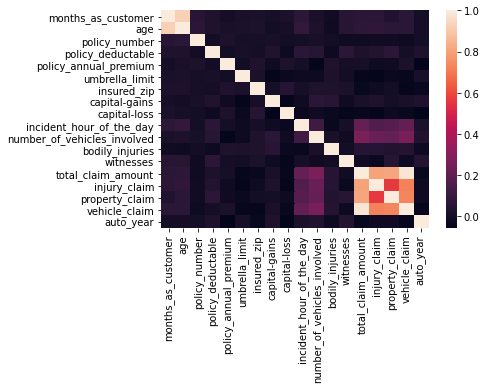

In [ ]:
#Plotting a correlation graph to check for correlation among variables.
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

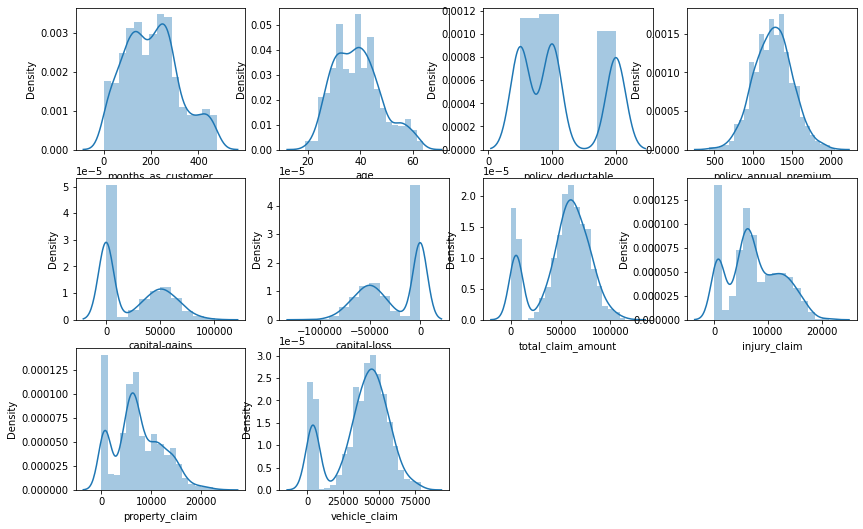

In [ ]:
# Creating graphs to show the distibution of each numeric variable.
col=['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains', 'capital-loss','total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']

plt.figure(figsize=(14,12))
k=1
for i in col:
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    k=k+1
plt.show()

The Variables are having a normal distribution and are not skewed!

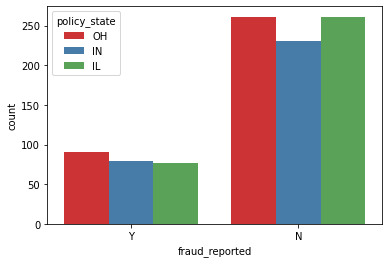

In [ ]:
#Creating histogram to check the state with maximum frauds
sns.countplot(x=df['fraud_reported'],hue=df['policy_state'],data=df,palette = "Set1")

The histogram shows that the state Ohio has a maximum fraud rate but also has the lowest fraud count. To understand the relation further among the variables, we created different graphs.

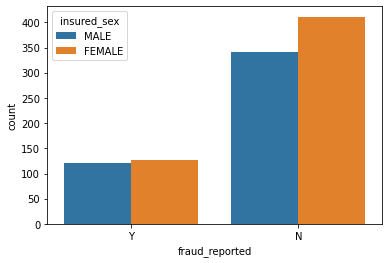

In [ ]:
##Creating histogram to check the gender commiting maximum frauds
sns.countplot(x=df['fraud_reported'],hue='insured_sex',data=df)

The histogram above shows that fraudulent claims have been raised more by the females.

In [ ]:
#Viewing the datatypes of each variable
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

## **Removing columns with missing values and values which do not contribute towards our prediction**

We have removed the below variables as they do not contribute towards the prediction of the target.
These variables do not have a significant impact on prediction.


In [ ]:
df.drop(['policy_number', #Drop policy_number column
         'policy_bind_date', #Drop policy_bind_date column
         'policy_csl', #Drop policy_csl column
         'incident_date', #Drop incident_date column
         'insured_zip', #Drop insured_zip column
         'collision_type', #Drop collision_type column
         'incident_location', #Drop incident_location column
         'property_damage', #Drop property_damage column
         'auto_make',#Drop auto_make column
         'auto_model',#Drop auto_model column
         'auto_year',#Drop auto_year column
         'police_report_available'],#Drop police_report_available column
         axis=1, inplace=True) 

In [ ]:
# Viewing the dataset after removing the variables.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Major Damage,Police,SC,Columbus,5,1,1,2,71610,6510,13020,52080,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Minor Damage,Police,VA,Riverwood,8,1,0,0,5070,780,780,3510,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Minor Damage,Police,NY,Columbus,7,3,2,3,34650,7700,3850,23100,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Major Damage,Police,OH,Arlington,5,1,1,2,63400,6340,6340,50720,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Minor Damage,None,NY,Arlington,20,1,0,1,6500,1300,650,4550,N


## **Recoding the columns with categorical data into numeric for modeling the dataset**

In [ ]:
#Creating dummy variables for multiclass columns 
df = pd.get_dummies(df, columns = ['policy_state',
                                   'insured_education_level',
                                   'insured_occupation',
                                   'insured_hobbies',
                                   'insured_relationship',
                                   'incident_type',
                                   'incident_severity', 
                                   'authorities_contacted',
                                   'incident_state',
                                   'incident_city'])

In [ ]:
#Recode the target variable to numeric
df['fraud_reported'].replace(('Y', 'N'), (1, 0), inplace=True)

In [ ]:
# recode the gender to numeric
df['insured_sex'].replace(('MALE', 'FEMALE'), (0, 1), inplace=True)

In [ ]:
# checking the distribution of target variable
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

# **Modeling** 


## **Split Data** <br>
Since the model is built on test data, there may be a chance of overfitting  during model evaluation. So we split data into Train and Test datasets
The model is built on Train data and evaluated on Test data. 

In [ ]:
# Specify data into X and Y variables for split

Y = df['fraud_reported'] #Storing the target variable in the Y 
X = df.drop(['fraud_reported'], axis=1) #Storing all the other columns except the target in X.

#View the number of rows and columns 
print(X.shape)
print(Y.shape)

(1000, 93)
(1000,)


In [ ]:
# convert to numpy arrays
X = np.array(X)

In [ ]:
# split into X_train and X_test
#We are splitting data using a 70/30 ratio, where 70% of data is used for training the model and 30% for testing it.
X_train, X_test, y_train, y_test = train_test_split(X, Y, #Split X and Y into 70/30 ratio
                                                    test_size=0.3,
                                                    random_state=12345)

#View the data shap after split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 93) (300, 93) (700,) (300,)


In [ ]:
# use minMax scaler
#We use minmax scaler to scale the dataset but still preserve the original distribution.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

##**Baseline Model: Logistic Regression**

In [ ]:
#Create a Logistic regression model to use as our baseline

model = LogisticRegression() #Creating the Logistic regression model
model.fit(X_train,y_train) #Fit the X and Y variables to the model 
prediction = model.predict(X_test) #Predict model output

In [ ]:
#Finding the baseline accuracy
accuracy_baseline = accuracy_score(y_test,prediction) 
print('Accuracy %f' %accuracy_baseline)

#Finding the Area Under Curve for our baseline logistic regression model.
AUC_baseline = metrics.roc_auc_score(y_test,prediction)
print('AUC %f' %AUC_baseline)

Accuracy 0.850000
AUC 0.755223


In [ ]:
#Viewing the baseline model predictions.
preds_baseline= np.round(model.predict(X_test),0)

# Creating the confusion matrix
confusion_matrix(y_test, preds_baseline) # (actual, predicted)

array([[215,  16],
       [ 29,  40]])

In [ ]:
#View the Classification report for our baseline logistic regression model 
print(classification_report(y_test, preds_baseline))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       231
           1       0.71      0.58      0.64        69

    accuracy                           0.85       300
   macro avg       0.80      0.76      0.77       300
weighted avg       0.84      0.85      0.84       300



We now need to create models which will give us a higher accuracy than the baseline.

We created 2 models - 

* Classification model with no callbacks
* Classification model with callbacks

## **Classification Model - No Callbacks**

* We will be using Sequential API to build the model
  * Input: 93 (The total number of columns which goes into the model)
  * Nodes in Hidden Layer 1: 25 
  * Activation Function : tanh
  * Nodes in Hidden Layer 2: 10
  * Activation Function : tanh
  * Nodes in output Layer:1
  * Activation Function : Sigmoid
  * Loss function: binary_crossentropy. 
  * Number of epochs = 100
  * batch size = 10

In [ ]:
# build the model with no callbacks

model1 = Sequential() #Using Sequential API for building the Dense Neural Network
model1.add(Dense(25, input_shape=(X_train.shape[1],), activation = 'tanh')) #Hidden Layer 1 with 25 hidden nodes and activation function as tanh
model1.add(Dropout(0.3))
model1.add(Dense(10, activation='tanh')) #Hidden layer 2 for the model with 10 hidden nodes and activation function as tanh
model1.add(Dense(1, activation='sigmoid')) #Output layer with 1 node using sigmoid activation function as the sigmoid function converts the output values between 0 and 1
model1.summary() #Printing model summary 

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 25)                2350      
_________________________________________________________________
dropout_55 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_113 (Dense)            (None, 10)                260       
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 11        
Total params: 2,621
Trainable params: 2,621
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Compilation
model1.compile(optimizer='Adam', #Using Adam as the optimizer function
              loss='binary_crossentropy', #We use binary cross entropy as the loss function since it is a binary classification problem
              metrics=['accuracy']) #Specifying the accuracy metric of the model

In [ ]:
# Fit the model  
history1 = model1.fit(X_train, y_train,
                    epochs = 100, #Number of iterations over the dataset 
                    batch_size = 10, #Number of samples per update 
                    validation_data=(X_test,y_test),
                    shuffle = True, #Shuffle the instances
                    verbose = 1)

Epoch 1/100
70/70 [==============================] - 1s 5ms/step - loss: 0.6654 - accuracy: 0.5942 - val_loss: 0.5242 - val_accuracy: 0.7700
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7318 - val_loss: 0.4919 - val_accuracy: 0.7700
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7544 - val_loss: 0.4528 - val_accuracy: 0.7767
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7742 - val_loss: 0.4177 - val_accuracy: 0.8000
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8338 - val_loss: 0.3879 - val_accuracy: 0.8000
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8044 - val_loss: 0.3693 - val_accuracy: 0.8233
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8458 - val_loss: 0.3589 - val_accuracy: 0.8300
Epoch 8/100
7

In [ ]:
#Plot the epochs
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

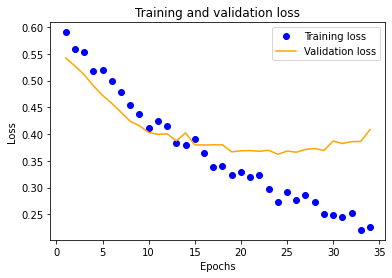

In [ ]:
#Plot the training and validation loss
history_dict = history.history
loss_values= history_dict['loss'] 
val_loss_values= history_dict['val_loss'] 
epochs1 = range(1, len(loss_values) + 1) # Specifies the range of X (no. of epochs specified above = 100)
plt.plot(epochs1, loss_values, 'bo', label='Training loss') #Plot Training loss
plt.plot(epochs1, val_loss_values, 'orange', label='Validation loss') #Plot validation loss
plt.title('Training and validation loss') #Plot title
plt.xlabel('Epochs') #Name of X axis 
plt.ylabel('Loss') #Name of Y axis
plt.legend()
plt.show()

In [ ]:
#Store model predictions
preds = np.round(model.predict(X_test),0)

# View the confusion matrix
confusion_matrix(y_test, preds) # (actual, predicted)

array([[208,  23],
       [ 18,  51]])

In [ ]:
#View the model Classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       231
           1       0.69      0.74      0.71        69

    accuracy                           0.86       300
   macro avg       0.80      0.82      0.81       300
weighted avg       0.87      0.86      0.86       300



* The accuracy for the model created using no callbacks is 87% and the accuracy of the baseline Logistic regression model is 85%.
* The model created has a higher accuracy compared to the baseline model.

##**Classification Model - With Callbacks**

* We will be using Sequential API to build the model
  * Input: 93 (The total number of columns which goes into the model)
  * Nodes in Hidden Layer 1: 25
  * Activation Function : Relu
  * Nodes in Hidden Layer 2: 10
  * Activation Fucntion : Tanh
  * Nodes in Hidden Layer 3: 3
  * Activation Function : Tanh
  * Nodes in Output Layer : 1
  * Activation Function : Sigmoid
* Dropout function probability = 0.3 
* Model compilation
  * Optimizer: rmsprop
  * Loss function: binary_crossentropy. 
  * Number of epochs = 100
  * batch size = 10

In [ ]:
# build a model

model = Sequential() #Using Sequential API for building the Dense Neural Network
model.add(Dense(25, input_shape=(X_train.shape[1],), activation = 'relu')) #Hidden Layer 1 with 25 hidden nodes and activation function as relu
model.add(Dropout(0.3))
model.add(Dense(10, activation='tanh')) #Hidden Layer 2 with 10 hidden nodes and activation function as tanh
model.add(Dropout(0.3))
model.add(Dense(3, activation='tanh')) #Hidden Layer 3 with 3 hidden nodes and activation function as tanh
model.add(Dense(1, activation='sigmoid')) #Output layer with 1 node using sigmoid activation function as the sigmoid function converts the output values between 0 and 1
model.summary() #Printing the summary of the model

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 25)                2350      
_________________________________________________________________
dropout_56 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_116 (Dense)            (None, 10)                260       
_________________________________________________________________
dropout_57 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_117 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 4         
Total params: 2,647
Trainable params: 2,647
Non-trainable params: 0
___________________________________________________

In [ ]:
# compile the model
model.compile(optimizer='rmsprop', # #Using rmsprop as the optimizer function
              loss='binary_crossentropy', #Using binary cross entropy as the loss function since it is a binary classification problem
              metrics=['accuracy']) #Specifying the accuracy metric of the model

In [ ]:
# Early Stopping Callback
es = EarlyStopping(monitor='val_accuracy', #Tracking validation accuracy for early stopping
                                   mode = 'max', #Stop training the model when the accuracy is maximum.
                                   patience = 10, #Number of epochs showing no improvement after training has stopped.
                                   restore_best_weights = True) #Restore the weights from the epoch with max accuracy

# Update the model fit call
history = model.fit(X_train, y_train,
                    callbacks=[es], #Using Early Stopping Callback
                    epochs = 100, #  Number of iterations over the dataset 
                    batch_size = 10, #Number of samples per update 
                    validation_data=(X_test,y_test),
                    shuffle = True, #Shuffle the instances
                    verbose = 1)

Epoch 1/100
70/70 [==============================] - 1s 4ms/step - loss: 0.6154 - accuracy: 0.7109 - val_loss: 0.5423 - val_accuracy: 0.7700
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7329 - val_loss: 0.5273 - val_accuracy: 0.7700
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7577 - val_loss: 0.5111 - val_accuracy: 0.7700
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7413 - val_loss: 0.4902 - val_accuracy: 0.7700
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7390 - val_loss: 0.4723 - val_accuracy: 0.7800
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7845 - val_loss: 0.4575 - val_accuracy: 0.7967
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7669 - val_loss: 0.4407 - val_accuracy: 0.7967
Epoch 8/100
7

In [ ]:
#Store model predictions
preds1 = np.round(model.predict(X_test),0)

# View the confusion matrix
confusion_matrix(y_test, preds) # (actual, predicted)

array([[208,  23],
       [ 18,  51]])

In [ ]:
# View the Classification Report
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       231
           1       0.72      0.70      0.71        69

    accuracy                           0.87       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.87      0.87      0.87       300



* The accuracy for the model created using callbacks is 86% and the accuracy of the baseline Logistic regression model is 85%.
* The model created using early stopping with callbacks has a higher accuracy compared to the baseline model.

# **Analysis & Results**

We first ran our data through a logistic regression model to establish the baseline for evaluating performance of our deep learning models.

## **Performance Metrics**

### Model 1

* Accuracy of Model 1 is 87%.
* The f-1 score is 0.71, suggesting that the model is predicting true positives and true negatives at the rate of 71%.
* This is the best performing model.

### Model 2

* Accuracy of Model 1 is 86%.
* The f-1 score is 0.71, suggesting that the model is predicting true positives and true negatives at the rate of 71%.

## **Baseline Model**

In [ ]:
#Accuracy of the Baseline Model
accuracy_baseline = accuracy_score(y_test,prediction)
print('Accuracy %f' %accuracy_baseline)

#AUC of the Baseline Model
AUC_baseline = metrics.roc_auc_score(y_test,prediction)
print('AUC %f' %AUC_baseline)

Accuracy 0.850000
AUC 0.755223


In [ ]:
# The confusion matrix for the Baseline Model
confusion_matrix(y_test, preds) # (actual, predicted)

array([[212,  19],
       [ 21,  48]])

In [ ]:
#Classification report of the Baseline Model
print(classification_report(y_test, preds_baseline))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       231
           1       0.71      0.58      0.64        69

    accuracy                           0.85       300
   macro avg       0.80      0.76      0.77       300
weighted avg       0.84      0.85      0.84       300



We then went on to build two models to run the selected rows of our dataset through. The first model was the classification model with no callbacks and the second was the classification model with callbacks. Both these models had different number of hidden layers and various activation functions.

## **Learning Curve**

### Model 1

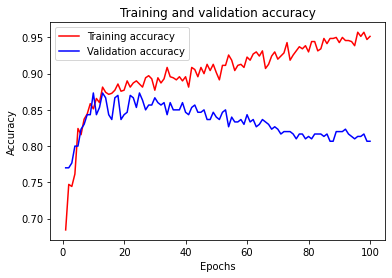

In [ ]:
## Evaluate the Model 1- The one without callback
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

# loss
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(1, len(acc1) + 1)

# "r" is for "solid red line"
plt.plot(epochs1, acc1, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs1, val_acc1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Maximum Validation Accuracy or Total Accuracy for Model 1
np.max(val_acc1)

0.8733333349227905

### Model 2

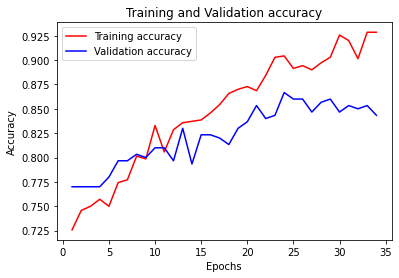

In [ ]:
## Evaluate the Model 2- The one with callback
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Maximum Validation Accuracy or Total Accuracy for Model 2
np.max(val_acc)

0.8666666746139526

## **Classification Report & Confusion Matrices**

### Model 1

In [ ]:
# Model 1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds1 = np.round(model1.predict(X_test),0)
print(confusion_matrix(y_test,preds1))
print(classification_report(y_test,preds))


[[204  27]
 [ 31  38]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       231
           1       0.72      0.70      0.71        69

    accuracy                           0.87       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.87      0.87      0.87       300



In [ ]:
# Model 1- Confusion Matrices
cm1 = confusion_matrix(y_test,preds)
TP1 = cm1[0][0]
FP1 = cm1[0][1]
FN1 = cm1[1][0]
TN1 = cm1[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR1 = round(TP1/(TP1+FN1), 2)
# Specificity or true negative rate
TNR1 = round(TN1/(TN1+FP1), 2) 
# Precision or positive predictive value
PPV1 = round(TP1/(TP1+FP1), 2)
# Negative predictive value
NPV1 = round(TN1/(TN1+FN1), 2)
# Fall out or false positive rate
FPR1 = round(FP1/(FP1+TN1), 2)
# False negative rate
FNR1 = round(FN1/(TP1+FN1), 2)
# False discovery rate
FDR1 = round(FP1/(TP1+FP1), 2)

# Overall accuracy
ACC1 = round((TP1+TN1)/(TP1+FP1+FN1+TN1), 2)

print("True Positive Rate: ", TPR1)
print("True Negative Rate: ", TNR1)
print("False Positive Rate: ", FPR1)
print("False Negative Rate: ", FNR1)
print("Positive Predicted Value: ", PPV1)
print("Negative Predicted Value : ", NPV1)
print("False Discovery Rate: ", FDR1)
print("Accuracy: ", ACC1)

True Positive Rate:  0.91
True Negative Rate:  0.72
False Positive Rate:  0.28
False Negative Rate:  0.09
Positive Predicted Value:  0.92
Negative Predicted Value :  0.7
False Discovery Rate:  0.08
Accuracy:  0.87


### Model 2

In [ ]:
# Model 2- The one with callback
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X_test),0)
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds1))

[[212  19]
 [ 21  48]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       231
           1       0.58      0.55      0.57        69

    accuracy                           0.81       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.80      0.81      0.80       300



In [ ]:
# Model 2 -The one with callback : Confusion Matrices
cm1 = confusion_matrix(y_test,preds1)
TP = cm1[0][0]
FP = cm1[0][1]
FN = cm1[1][0]
TN = cm1[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = round(TP/(TP+FN), 2)
# Specificity or true negative rate
TNR = round(TN/(TN+FP), 2) 
# Precision or positive predictive value
PPV = round(TP/(TP+FP), 2)
# Negative predictive value
NPV = round(TN/(TN+FN), 2)
# Fall out or false positive rate
FPR = round(FP/(FP+TN), 2)
# False negative rate
FNR = round(FN/(TP+FN), 2)
# False discovery rate
FDR = round(FP/(TP+FP), 2)

# Overall accuracy
ACC = round((TP+TN)/(TP+FP+FN+TN), 2)

print("True Positive Rate: ", TPR)
print("True Negative Rate: ", TNR)
print("False Positive Rate: ", FPR)
print("False Negative Rate: ", FNR)
print("Positive Predicted Value: ", PPV)
print("Negative Predicted Value : ", NPV)
print("False Discovery Rate: ", FDR)
print("Accuracy: ", ACC)


True Positive Rate:  0.87
True Negative Rate:  0.58
False Positive Rate:  0.42
False Negative Rate:  0.13
Positive Predicted Value:  0.88
Negative Predicted Value :  0.55
False Discovery Rate:  0.12
Accuracy:  0.81


#Conculsion 

The models that were created had an average accuracy rate of 86% to detect the probability of fraud in an insurance claim.This model was successful in detecting fraud based on our selected variables with a high degree of accuracy. By playing around with the neural networks and changing various features like the activation fucntions, number of hidden layers and the nodes in those layers we were able to build models with high accuracy. 

The procedures to detect fraud in the past were largely based on instinct and unsubstantial facts which hardly serves our purpose in the present. Current frauds occur in an organized manner and it is difficult to identify them without a sophisticated system. We have shifted to a statistical and analytical approach towards detecting fraud. This will enable businesses to minimize loss ratios and improve their efficiency and performance. 

Based on this work, it would be reasonable to suggest insurance companies or anti-fraud agencies to set up systems or frameworks that can process all claims and alert them when claims with similar characteristics are filed. Also it is suggested to form teams solely to investigate these in a more effective and detailed manner when receiving these alerts of having a higher probability of fraud. Another recommendation is to hold on processing someone’s insurance claim until the company receives a police report in case of theft or drunk driving accidents, or some photo evidence in case of collisions or hit accidents. That’s not to say that exceptions may not happen, but this would be the general trend in the population. 
Insurance companies, in this case the car insurance industry, and their leaders should keep in mind that there is no one solution for all, and people with ill-intent constantly develop work arounds for the rules and regulations and come up with new ways of committing fraud. Companies may take help of market research to update the predictive models on a constant basis to account for such changes, for better identification. They may also develop frameworks to score the claims on the basis of availability of proof and documentation, and any claim that falls below a certain threshold should be kept on hold and investigated further. In conclusion, always be ready to adapt quickly to changing market conditions and in turn, improve their fraud detection.




# Citations

Works Cited

[1] “Insurance Fraud.” FBI, FBI, 17 Mar. 2010, fbi.gov/stats-services/publications/insurance-fraud. 

[2] “Background on: Insurance Fraud.” Insurance Information Institute, Insurance Information Institute, Inc., 18 Nov. 2020, www.iii.org/article/background-on-insurance-fraud. 

[3] “Insurance Fraud Examples.” Nebraska DOI, Nebraska Department of Insurance, doi.nebraska.gov/sites/doi.nebraska.gov/files/doc/examples.pdf. 

[4] FOXBusiness. “The True Cost of Auto Insurance Fraud - How We All Pay In Increased Premiums.” Fox Business, Fox Business, 6 Jan. 2016, www.foxbusiness.com/features/the-true-cost-of-auto-insurance-fraud-how-we-all-pay-in-increased-premiums.

[5] “5 Types Of Car Insurance Fraud.” Allstate Car Insurance Resources, Allstate, July 2020, www.allstate.com/tr/car-insurance/5-types-of-car-insurance-fraud.aspx. 

[6] Corum, David. “Insurance Research Council Finds That Fraud and Buildup Add Up to $7.7 Billion in Excess Payments for Auto Injury Claims.” Insurance Research Council, Insurance Research Council, 3 Feb. 2015, www.insurance-research.org/sites/default/files/downloads/IRC%20Fraud%20News%20Release.pdf.

[7] Edmunds. “Auto Insurance Fraud: What It Costs You.” Edmunds, 25 Aug. 2009, www.edmunds.com/auto-insurance/auto-insurance-fraud-what-it-costs-you.html#

[8] “The Role of Data and Analytics in Insurance Fraud Detection: Reuters Events: Insurance.” The Role of Data and Analytics in Insurance Fraud Detection | Reuters Events | Insurance, www.reutersevents.com/insurance/fraud/role-data-and-analytics-insurance-fraud-detection. 

[9] Pandhare, Sachin. “Big Data Analytics: Whistleblower on Insurance Fraud.” Infosys, Infosys Limited, 2018, www.infosys.com/industries/insurance/white-papers/documents/new-whistleblower-insurance-fraud.pdf. 

[10] Roy, Riya, and Thomas K George. “Detecting Insurance Claims Fraud Using Machine Learning Techniques.” IEEE Xplore, Apr. 2017, ieeexplore.ieee.org/abstract/document/8074258. 